In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../ficheros/dataframe_estudio.csv', index_col = 0)
df.shape

(2297, 10)

In [3]:
df.head(2)

,country,current_role,yearly_compensation,programming_languages,ides,visualization,activities,gender,primary_tool,ages
16,Belgium,Data Analyst,"2,000-2,999","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Local development environments (RStudio, Jupyt...",mediana
32,United States of America,Data Analyst,unknown,R,RStudio,Ggplot / ggplot2,unknown,Nonbinary,unknown,joven


## ¿Cuáles son los entornos de desarrollo en los que más se trabaja?

In [4]:
df['ides'].unique()

array(['Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Jupyter Notebook',
       'RStudio ', ' Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,Visual Studio Code (VSCode) ,PyCharm ,MATLAB ,Jupyter Notebook',
       'RStudio ,Jupyter Notebook', 'PyCharm , Spyder', ' None',
       'Jupyter Notebook, Other', 'Visual Studio ,Jupyter Notebook',
       'Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,PyCharm , Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,RStudio , Spyder',
       ' Spyder',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,PyCharm ,Jupyter Notebook',
       'Visual Studio ', 'PyCharm ,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,RStudio ,PyCharm , Spyder, Sublime Text,Jupyter Notebook',
   

In [5]:
#df["ides"] = df["ides"].replace("^Jupyter[A-Za-z(,\s)]*$","Jupyter", regex = True)
df["ides"] = df["ides"].replace("\([A-Za-z(,\s)]*\)","", regex = True)
df["ides"] = df["ides"].replace("Jupyter Notebook","Jupyter", regex = True)

In [6]:
df['ides'].unique()

array(['Jupyter  ,Jupyter', 'RStudio ', ' Notepad++,Jupyter',
       'Jupyter  ,PyCharm ,MATLAB ,Jupyter', 'RStudio ,Jupyter',
       'PyCharm , Spyder', ' None', 'Jupyter, Other',
       'Visual Studio ,Jupyter', 'Jupyter',
       'Jupyter  ,Visual Studio ,PyCharm , Notepad++,Jupyter',
       'Jupyter  ,RStudio , Spyder', ' Spyder',
       'Jupyter  ,PyCharm ,Jupyter', 'Visual Studio ', 'PyCharm ,Jupyter',
       'Jupyter  ,RStudio ,PyCharm , Spyder, Sublime Text,Jupyter',
       'Visual Studio Code  ', 'Visual Studio Code  , Notepad++,Jupyter',
       'Visual Studio Code  ,Jupyter', 'RStudio ,PyCharm ,MATLAB ',
       'RStudio ,Visual Studio ,Visual Studio Code  ,PyCharm ,Jupyter',
       'unknown', ' Spyder, Other', ' Notepad++',
       'Jupyter  ,RStudio ,PyCharm , Spyder, Notepad++,Jupyter',
       'Jupyter  ,PyCharm ,MATLAB ', 'Jupyter  ',
       'Visual Studio Code  , Spyder,Jupyter', ' Notepad++, Vim / Emacs',
       'PyCharm ', 'RStudio ,Visual Studio ,PyCharm ,Jupyter',
     

In [7]:
def crear_filas(df,patron,columna):
    """
    Esta función divide la respuesta de cada individuo separándola por comas y crea 1 fila por cada separación
    Args: 
    df(df):dataframe sobre el que queremos aplicar los cambios
    patron(string): es el patron por el que nuestra función nos va a hacer la separación
    columna(string): es el nombre de la columna sobre la que queremos aplicar nuestra función
    """
    
    df[columna] = df[columna].str.split(patron, n = -1)
       
    return df.explode(columna).reset_index(drop = True)

In [8]:
df = crear_filas(df, ",", "ides")

In [9]:
df

,country,current_role,yearly_compensation,programming_languages,ides,visualization,activities,gender,primary_tool,ages
0,Belgium,Data Analyst,"2,000-2,999","Python, SQL",Jupyter,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Local development environments (RStudio, Jupyt...",mediana
1,Belgium,Data Analyst,"2,000-2,999","Python, SQL",Jupyter,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Local development environments (RStudio, Jupyt...",mediana
2,United States of America,Data Analyst,unknown,R,RStudio,Ggplot / ggplot2,unknown,Nonbinary,unknown,joven
3,Egypt,Data Analyst,"7,500-9,999",Python,Notepad++,None,Analyze and understand data to influence produ...,Woman,"Basic statistical software (Microsoft Excel, G...",mediana
4,Egypt,Data Analyst,"7,500-9,999",Python,Jupyter,None,Analyze and understand data to influence produ...,Woman,"Basic statistical software (Microsoft Excel, G...",mediana
...,...,...,...,...,...,...,...,...,...,...
5135,India,Data Analyst,"3,000-3,999","Python, C",PyCharm,"Matplotlib ,Seaborn ,Ggplot / ggplot2",Experimentation and iteration to improve exist...,Man,unknown,mediana
5136,India,Data Analyst,"3,000-3,999","Python, C",Jupyter,"Matplotlib ,Seaborn ,Ggplot / ggplot2",Experimentation and iteration to improve exist...,Man,unknown,mediana
5137,Egypt,Data Analyst,"15,000-19,999","Python, SQL, Javascript, Bash",Jupyter,"Matplotlib ,Seaborn",Analyze and understand data to influence produ...,Man,"Business intelligence software (Salesforce, Ta...",mediana
5138,Egypt,Data Analyst,"15,000-19,999","Python, SQL, Javascript, Bash",Vim / Emacs,"Matplotlib ,Seaborn",Analyze and understand data to influence produ...,Man,"Business intelligence software (Salesforce, Ta...",mediana


In [10]:
df["ides"].value_counts()

Jupyter                 1429
RStudio                  563
PyCharm                  538
Jupyter                  466
Visual Studio Code       452
 Notepad++               386
 Spyder                  337
Visual Studio            270
 Sublime Text            206
unknown                  143
MATLAB                   123
 Other                   109
 Vim / Emacs              66
 None                     52
Name: ides, dtype: int64

In [11]:
def limpieza(elemento):
    """
    Esta función nos permite eliminar los espacios que hay al principio y al final de los strings 
    Args: elementos
    elemento(string): es el dato al que le queremos quitar los espacios 
    """
    try:
        return elemento.strip()
         
    except:
        return elemento

In [12]:
df['ides'] = df['ides'].apply(limpieza)
df['ides'].unique()

array(['Jupyter', 'RStudio', 'Notepad++', 'PyCharm', 'MATLAB', 'Spyder',
       'None', 'Other', 'Visual Studio', 'Sublime Text',
       'Visual Studio Code', 'unknown', 'Vim / Emacs'], dtype=object)

In [13]:
df["ides"].value_counts()

Jupyter               1895
RStudio                563
PyCharm                538
Visual Studio Code     452
Notepad++              386
Spyder                 337
Visual Studio          270
Sublime Text           206
unknown                143
MATLAB                 123
Other                  109
Vim / Emacs             66
None                    52
Name: ides, dtype: int64

In [14]:
ordenado = df['ides'].value_counts().sort_values(ascending = False).head()
ordenado_desc = pd.DataFrame(ordenado).reset_index()

In [15]:
ordenado_desc

,index,ides
0,Jupyter,1895
1,RStudio,563
2,PyCharm,538
3,Visual Studio Code,452
4,Notepad++,386


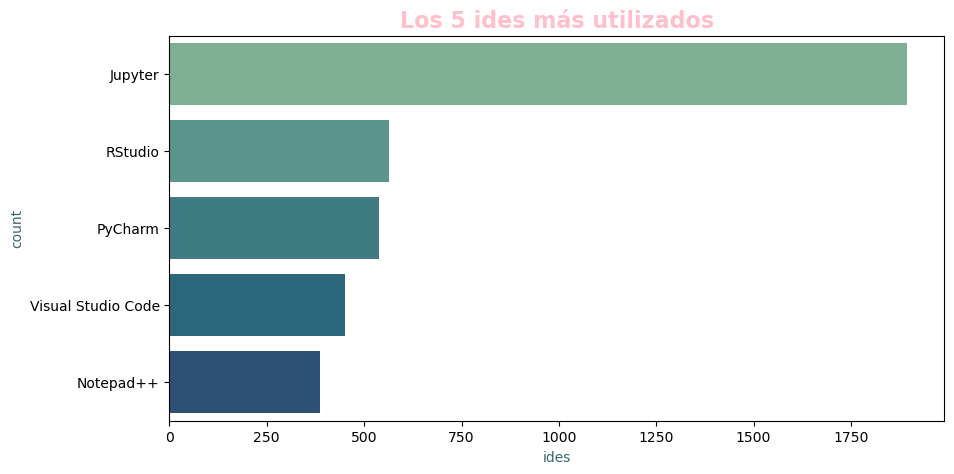

In [22]:
plt.figure(figsize =(10,5))
sns.barplot(y = "index", x = "ides", data = ordenado_desc, palette="crest");
plt.title("Los 5 ides más utilizados", color = "pink", fontweight='bold', fontsize = 16);
plt.xlabel("ides", color = "#3a6670");
plt.ylabel("count", color = "#3a6670");
#fig.tight_layout()